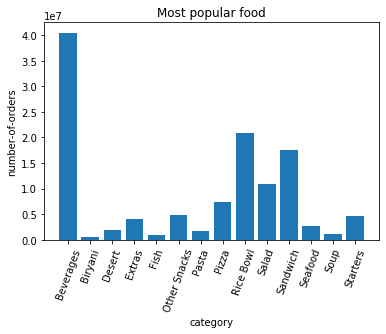

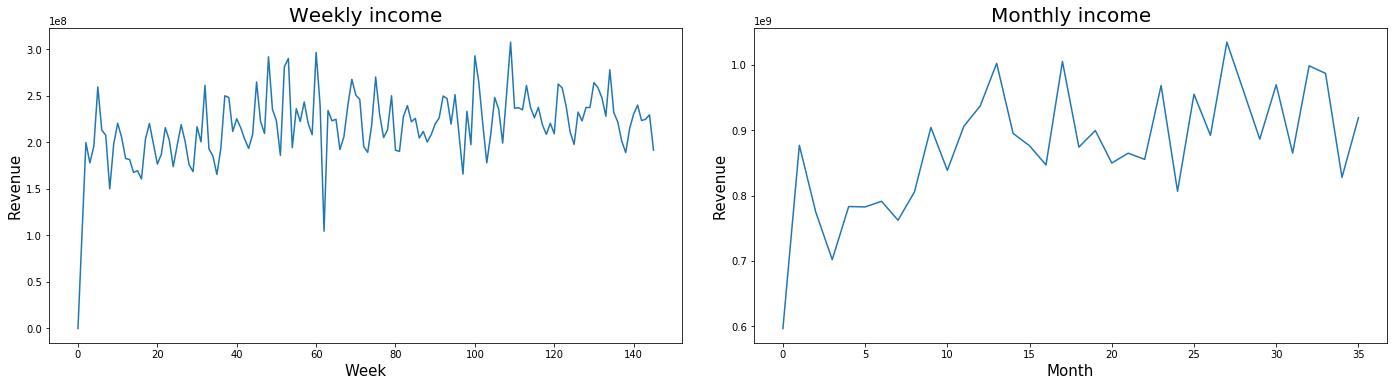

In [24]:
'''Note: 

* Before writing any code remember that this assigment is for helping you understand the basics of file
handling in csv file. 

* This project is designed to have a work flow such that everyone is in same page for this purpose the variables are
given a strict name which should not be changed or modified according to your convinience

* Few of new functions like .head() .xticks().... and concepts may have been introduced in the assingment, so we encourage you
all to go through them without skipping.

*  functions which are to be used in the Your code sections are globally available so try to look for those where you have been prompted
'''

'''Its the data of a meal delivery company which operates in multiple cities. 
They have various fulfillment centers in these cities for dispatching meal orders to their customers.
train.csv: Historical data of demand for a product-center combination 
fulfilment_center_info.csv: Information for fulfillment center like center area, city information etc.
meal_info.csv: Product(Meal) features such as category, sub-category, current price and discount'''


'''START CODE'''

#Import necessary libraries: Numpy,pandas,matplotlib

'''************************Your code here**********************'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

'''************************************************************'''


#read meal_info.csv file from provided dataset into a df_meal named variable
#Note: Proper file directory should be provided

'''************************Your code here**********************'''

df_meal=pd.DataFrame(pd.read_csv('meal_info.csv'))

'''************************************************************'''


df_meal.head()
'''This is for displaying first five data points'''

#read fulfilment_center_info.csv file from provided dataset
#Note: Proper file directory should be provided

'''************************Your code here**********************'''

df_center=pd.DataFrame(pd.read_csv('fulfilment_center_info.csv'))

'''************************************************************'''

df_center.head()
'''This is for displaying first five data points'''

#read train.csv file from provided dataset
#Note: Proper file directory should be provided

'''************************Your code here**********************'''

df_food=pd.DataFrame(pd.read_csv('train.csv'))

'''************************************************************'''

df_food.head()

'''Since the provided information is in different files, your work here is to merge them.Look for the functions
in pandas library to do so'''

'''************************Your code here**********************'''

df=pd.merge(df_food,df_center)
df=pd.merge(df,df_meal)

'''************************************************************'''

'''Here we have used pd.pivot_table() kindly go through the function and mention in comment what it does'''

table = pd.pivot_table(data=df,index='category',values='num_orders',aggfunc=np.sum)
#Aggregates num_orders based on category
table=pd.DataFrame(table.to_records())


'''Graph tweaking
************************
Plot a bar graph with title 'Most popular food' for category(x-axis) vs number-of-orders(y-axis)

give x label 'Food items'
give y label 'Quantity sold'


'''

'''************Yourcode*********************'''

#bar graph
plt.bar(table['category'],table['num_orders'])

#xticks 
plt.xticks(rotation=70) 
#rotates x-axis labels by 70 degrees
'''Write on comment what you feel this function does'''

#x-axis labels 
plt.xlabel('category')

#y-axis labels 
plt.ylabel('number-of-orders')

#plot title 
plt.title('Most popular food')

#save plot 
plt.savefig('popular_foods.png')

#display 
plt.show()

'''************************************************'''


'''Comparison of weekly and monthly sales
 Create a new column
* named 'revenue' where each element is product of checkout_price and num_orders 
** named 'month' by using ['week'] column (week column value divided by 4 gives month value)'''



'''**************************Your code******************************'''
revenue=df['checkout_price']*df['num_orders']
df['revenue']=revenue

month=np.floor(df['week']/4)
df['month']=month


'''******************************************************************'''
'''Here we have created two list month and month_order ,
store month number in month list and revenue of each month in month_order'''
#list to store month-wise revenue 
month=[] 
month_order=[] 

'''***********************************Your code***********************'''

table2 = pd.pivot_table(data=df,index='month',values='revenue',aggfunc=np.sum)
table2=pd.DataFrame(table2.to_records())
month=table2['month']
month_order=table2['revenue']
    
'''*********************************************************************'''
'''Here we have created two list week and week_order ,you need to store in them mapping the monthly orders'''    
#list to store week-wise revenue 
week=[] 
week_order=[] 

'''***********************************Your code***********************'''
table1 = pd.pivot_table(data=df,index='week',values='revenue',aggfunc=np.sum)
table1=pd.DataFrame(table1.to_records())
week=table1['week']
week_order=table1['revenue']

'''*********************************************************************'''
''' Plot two subplots in the same space : one for weekly revenue and other for monthly revenue.
For weekly : Title(Weekly income),x_label(week),y_label(revenue); similarly for monthly revenue.
'''

'''************Yourcode*********************'''

'''****adding first row and deleting last row of week and month data frames*******'''
table1.iloc[0] = [0, 0]
last_row = len(table2)
table2 = table2.drop(table2.index[last_row-1])
'''******************************************'''

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 6))

ax1.plot(table1['week'],table1['revenue'])
ax1.set_title('Weekly income',fontsize=20)
ax1.set_xlabel('Week',fontsize=15)
ax1.set_ylabel('Revenue',fontsize=15)

ax2.plot(table2['month'],table2['revenue'])
ax2.set_title('Monthly income',fontsize=20)
ax2.set_xlabel('Month',fontsize=15)
ax2.set_ylabel('Revenue',fontsize=15)

fig.tight_layout(pad=3.0)

''' Display the plot'''
plt.show()